In [1]:
import pandas as pd

In [2]:
# Load the uploaded crime_data_cleanedset
file = 'crime data.csv'
crime_data = pd.read_csv(file)



### Code Explanation: Removing Unnecessary Columns from `crime_data` DataFrame

The following code snippet focuses on cleaning the `crime_data` DataFrame by removing specific columns deemed unnecessary for the current analysis. This process helps streamline the data, making it more efficient for analysis by retaining only the relevant fields.

1. **Define the Columns to Removing the specified columns**:  
   - `AREA`: Possibly referring to a general area identifier.
   - `Part 1-2`, `Crm Cd`, `Crm Cd 1`, `Crm Cd 2`, `Crm Cd 3`, `Crm Cd 4`: Crime codes that may not be relevant to the current focus.
   - `Mocodes`: Modus operandi codes that may add unnecessary complexity.
   - `Vict Descent`: Information on the victim’s descent, which might not be relevant for the analysis.
   - `Premis Cd`: Code representing premises type.
   - `Weapon Used Cd`: Code for the type of weapon used.
   - `Status`: Status of the case or report.
   - `LOCATION` and `Cross Street`: Geographical data not required in the cleaned dataset.
   - `LAT`, `LON`: Latitude and longitude coordinates.
   - `TIME OCC`: Time of occurrence, potentially adding detail not necessary at this stage.

This results in a cleaned version of the `crime_data` DataFrame, with only the necessary columns for further analysis. The cleaned dataset is stored in `crime_data_cleaned` for further use in the project.

---

In [127]:
# 3. Define the list of columns to remove
columns_to_remove = [
    'AREA',
    'Part 1-2',
    'Crm Cd',
    'Mocodes',
    'Vict Descent',
    'Premis Cd',
    'Weapon Used Cd',
    'Status',
    'Crm Cd 1',
    'Crm Cd 2',
    'Crm Cd 3',
    'Crm Cd 4',
    'LOCATION',
    'Cross Street',
    'LAT',
    'LON',
    'TIME OCC'
]

# 4. Remove the specified columns
# Option 1: Create a new DataFrame without the unwanted columns
crime_data_cleaned = crime_data.drop(columns=columns_to_remove, errors='ignore')

In [128]:
crime_data_cleaned.head()

,DR_NO,Date Rptd,DATE OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,Status Desc
0,190326475,03-01-2020 00:00,03-01-2020 00:00,Wilshire,784,VEHICLE - STOLEN,0,M,STREET,NaN,Adult Arrest
1,200106753,02-09-2020 00:00,02-08-2020 00:00,Central,182,BURGLARY FROM VEHICLE,47,M,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont
2,200320258,11-11-2020 00:00,11-04-2020 00:00,Southwest,356,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont
3,200907217,05-10-2023 00:00,03-10-2020 00:00,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,CLOTHING STORE,NaN,Invest Cont
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,Hollywood,666,THEFT OF IDENTITY,28,M,SIDEWALK,NaN,Invest Cont


In [129]:
# Display a summary of the data to understand its structure
crime_data_cleaned.info()
crime_data_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DR_NO        1071 non-null   int64 
 1   Date Rptd    1071 non-null   object
 2   DATE OCC     1071 non-null   object
 3   AREA NAME    1071 non-null   object
 4   Rpt Dist No  1071 non-null   int64 
 5   Crm Cd Desc  1071 non-null   object
 6   Vict Age     1071 non-null   int64 
 7   Vict Sex     1000 non-null   object
 8   Premis Desc  1071 non-null   object
 9   Weapon Desc  210 non-null    object
 10  Status Desc  1071 non-null   object
dtypes: int64(3), object(8)
memory usage: 92.2+ KB


(1071, 11)

### Checking for Missing Values in `crime_data_cleaned`

The code `crime_data_cleaned.isnull().sum()` is used to identify missing values in the `crime_data_cleaned` DataFrame by calculating the total number of null values in each column. The output provides a count of missing entries, which can guide us in handling incomplete data effectively.


#### Insights

- **`Vict Sex` and `Weapon Desc`** columns have missing values:
  - `Vict Sex` has 71 missing values.
  - `Weapon Desc` has a significant number of missing values (861).
  
These missing values may need to be addressed depending on the analysis requirements. Possible handling methods include imputation, filling with a default value, or excluding rows with missing values, depending on the impact on the analysis objectives.

In [130]:
crime_data_cleaned.isnull().sum()

DR_NO            0
Date Rptd        0
DATE OCC         0
AREA NAME        0
Rpt Dist No      0
Crm Cd Desc      0
Vict Age         0
Vict Sex        71
Premis Desc      0
Weapon Desc    861
Status Desc      0
dtype: int64

### Filling Missing Values in `crime_data_cleaned`

To address missing values in key columns, the following code fills the null entries with specific default values. This approach ensures consistency and completeness in the dataset, which is crucial for accurate analysis.

1. **Fill Missing Values in `Vict Sex`**:
   - `crime_data_cleaned['Vict Sex'].fillna('Unidentified', inplace=True)`
   - This line fills missing values in the `Vict Sex` column with the value `'Unidentified'`, which helps retain these records while clearly indicating unidentified gender information.

2. **Fill Missing Values in `Weapon Desc`**:
   - `crime_data_cleaned['Weapon Desc'].fillna('None', inplace=True)`
   - This line replaces missing values in the `Weapon Desc` column with `'None'`, indicating that no weapon was reported or applicable. This prevents the need to drop records with missing weapon descriptions, preserving the dataset's completeness.

Using these default values maintains the dataset's structure and makes it ready for further analysis without losing potentially useful information due to missing entries.

In [131]:
# Fill missing values
crime_data_cleaned['Vict Sex'].fillna('Unidentified', inplace=True)
crime_data_cleaned['Weapon Desc'].fillna('None', inplace=True)



In [132]:
crime_data_cleaned.isnull().sum()

DR_NO          0
Date Rptd      0
DATE OCC       0
AREA NAME      0
Rpt Dist No    0
Crm Cd Desc    0
Vict Age       0
Vict Sex       0
Premis Desc    0
Weapon Desc    0
Status Desc    0
dtype: int64

### Standardizing Dates in the `Date Rptd` Column

This code defines a function to clean and standardize dates in the `Date Rptd` column, which might contain different date formats. The function adjusts any inconsistencies, such as different separators (slashes vs. hyphens), removes unnecessary details like "AM/PM" or trailing "00:00," and then tries to convert each date into a consistent format.

After defining this function, it’s applied to the `Date Rptd` column, creating a new, standardized column called `Date Rptd Standardized`. This ensures all dates are uniform, making them easier to work with in further analysis. Finally, a quick preview displays both the original and standardized dates to confirm successful conversion.

In [133]:
# Refined function to handle the additional time format and trailing "00:00"
def standardize_date_refined(date_str):
    # Handle different formats
    if isinstance(date_str, str):
        if '/' in date_str:
            date_str = date_str.replace('/', '-')
        if ' AM' in date_str or ' PM' in date_str:
            date_str = date_str[:-3]  # Remove AM/PM
        if date_str.endswith(" 00:00"):
            date_str = date_str.replace(" 00:00", "")
    
    # Try to parse the date
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')
    except ValueError:
        try:
            # If time isn't specified, pandas will default to 00:00:00
            return pd.to_datetime(date_str, format='%m-%d-%Y')
        except ValueError:
            try:
                # Another attempt with standard pandas parsing if specific format fails
                return pd.to_datetime(date_str, errors='coerce')
            except ValueError:
                print(f"Failed to parse: {date_str}")
                return None

# Apply the refined function to standardize the 'Date Rptd' column
crime_data_cleaned['Date Rptd Standardized'] = crime_data['Date Rptd'].apply(standardize_date_refined)

# Display a sample of the data to check results
crime_data_cleaned[['Date Rptd', 'Date Rptd Standardized']].head()


,Date Rptd,Date Rptd Standardized
0,03-01-2020 00:00,2020-03-01 00:00:00
1,02-09-2020 00:00,2020-02-09 00:00:00
2,11-11-2020 00:00,2020-11-11 00:00:00
3,05-10-2023 00:00,2023-05-10 00:00:00
4,08/18/2022 12:00:00 AM,2022-08-18 12:00:00


### Dropping Original Date Columns After Standardization

This code removes the original `Date Rptd` and `DATE OCC` columns from the `crime_data_cleaned` DataFrame after the dates have been standardized and stored in a new column. Dropping these columns helps to streamline the dataset, retaining only the standardized date format for consistency and clarity in analysis.

After removing these columns, the `head()` function is used to display the first few rows of the updated DataFrame to confirm the changes.

In [134]:
# Dropping the original 'Date Rptd' column after standardization
crime_data_cleaned.drop(columns=['Date Rptd','DATE OCC'], inplace=True)

# Display the updated dataframe to confirm the column has been removed
crime_data_cleaned.head()


,DR_NO,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,Status Desc,Date Rptd Standardized
0,190326475,Wilshire,784,VEHICLE - STOLEN,0,M,STREET,None,Adult Arrest,2020-03-01 00:00:00
1,200106753,Central,182,BURGLARY FROM VEHICLE,47,M,BUS STOP/LAYOVER (ALSO QUERY 124),None,Invest Cont,2020-02-09 00:00:00
2,200320258,Southwest,356,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,Invest Cont,2020-11-11 00:00:00
3,200907217,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,CLOTHING STORE,None,Invest Cont,2023-05-10 00:00:00
4,220614831,Hollywood,666,THEFT OF IDENTITY,28,M,SIDEWALK,None,Invest Cont,2022-08-18 12:00:00


### Creating Separate Columns for Month, Day, and Year

This code segment refines the standardized date in the `Date Rptd Standardized` column by breaking it down into separate columns for **Month**, **Day**, and **Year**, allowing for more detailed time-based analysis.

1. **Ensure Date Format**:  
   - The first line ensures that `Date Rptd Standardized` is recognized as a datetime format, allowing for easy extraction of specific date components.

2. **Extract Month, Day, and Year**:  
   - Using `.dt.month`, `.dt.day`, and `.dt.year`, new columns are created for each part of the date. This breakdown supports more granular time analysis, such as examining trends by specific months or years.

3. **Optional Month as Text**:  
   - The `Month_Str` column converts the month number into a full month name (e.g., January, February) for easier readability in reports or visualizations. If this text format is used, the numeric `Month` column can optionally be removed for clarity.

4. **Drop `Date Rptd Standardized`**:  
   - Finally, the `Date Rptd Standardized` column is dropped, leaving only the newly created time-related columns. This keeps the DataFrame clean and focused on the components required for analysis.

The updated DataFrame, now including separate columns for month, day, and year, is displayed to confirm successful transformation.

In [135]:

# Ensure 'Date Rptd_Standardized' is of datetime type
crime_data_cleaned['Date Rptd Standardized'] = pd.to_datetime(crime_data_cleaned['Date Rptd Standardized'])

# Extract Month, Day, Year into separate columns
crime_data_cleaned['Month'] = crime_data_cleaned['Date Rptd Standardized'].dt.month
crime_data_cleaned['Day']   = crime_data_cleaned['Date Rptd Standardized'].dt.day
crime_data_cleaned['Year']  = crime_data_cleaned['Date Rptd Standardized'].dt.year

# Optional: If you want Month as String (e.g., January, February, etc.)
crime_data_cleaned['Month_Str'] = crime_data_cleaned['Date Rptd Standardized'].dt.strftime('%B')
# If using Month_Str, you might want to drop the numeric 'Month' column

# Drop the 'Date Rptd_Standardized' column (and 'Date Rptd' if not needed)
df = crime_data_cleaned.drop(columns=['Date Rptd Standardized'])  # Comment out 'Date Rptd' if needed

print(crime_data_cleaned)


          DR_NO    AREA NAME  Rpt Dist No  \
0     190326475     Wilshire          784   
1     200106753      Central          182   
2     200320258    Southwest          356   
3     200907217     Van Nuys          964   
4     220614831    Hollywood          666   
...         ...          ...          ...   
1066  230915809     Van Nuys          946   
1067  221011912  West Valley         1033   
1068  211517150  N Hollywood         1513   
1069  222008033      Olympic         2016   
1070  220808336      West LA          812   

                                            Crm Cd Desc  Vict Age Vict Sex  \
0                                      VEHICLE - STOLEN         0        M   
1                                 BURGLARY FROM VEHICLE        47        M   
2                                         BIKE - STOLEN        19        X   
3              SHOPLIFTING-GRAND THEFT ($950.01 & OVER)        19        M   
4                                     THEFT OF IDENTITY        28    

In [136]:
crime_data_cleaned.head()

,DR_NO,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,Status Desc,Date Rptd Standardized,Month,Day,Year,Month_Str
0,190326475,Wilshire,784,VEHICLE - STOLEN,0,M,STREET,None,Adult Arrest,2020-03-01 00:00:00,3,1,2020,March
1,200106753,Central,182,BURGLARY FROM VEHICLE,47,M,BUS STOP/LAYOVER (ALSO QUERY 124),None,Invest Cont,2020-02-09 00:00:00,2,9,2020,February
2,200320258,Southwest,356,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,Invest Cont,2020-11-11 00:00:00,11,11,2020,November
3,200907217,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,CLOTHING STORE,None,Invest Cont,2023-05-10 00:00:00,5,10,2023,May
4,220614831,Hollywood,666,THEFT OF IDENTITY,28,M,SIDEWALK,None,Invest Cont,2022-08-18 12:00:00,8,18,2022,August


### Objective

The goal is to identify the most common types of crime in each area, providing insights into specific crime patterns. This information can help authorities and stakeholders allocate resources effectively and implement targeted measures to address prevalent crime types in high-risk areas.

### Approach and Rationale

To address this objective, we’ve chosen a multi-step process involving data grouping, ranking, and visualization. Here’s why each step is essential and why this approach is effective:

1. **Grouping and Counting Crime Types by Area**:
   - **What we’re doing**: We group the data by `AREA NAME` and `Crm Cd Desc` (crime description) to count how often each crime type occurs in each area.
   - **Why this is effective**: This initial grouping provides a granular breakdown of crime types by location, allowing us to identify not just the most common crime overall, but specifically within each area. This level of detail is crucial for tailoring interventions to local needs.

2. **Sorting and Selecting the Most Frequent Crime**:
   - **What we’re doing**: After counting, we sort the data by `AREA NAME` and `Count` in descending order to rank crime types within each area by frequency. We then select only the highest-frequency crime in each area.
   - **Why this is effective**: Sorting and ranking reveal the top crime in each area. By focusing on the most frequent crime, we simplify our findings, highlighting specific crime types that may require priority attention. This method prevents overwhelming detail and keeps the analysis focused on actionable insights.

3. **Preparing Data for Visualization**:
   - **What we’re doing**: We create a pivot table that organizes the data to easily extract the top crime type per area for visualization.
   - **Why this is effective**: Pivoting the data prepares it for clear and intuitive visualization, allowing for easy comparison across areas in a bar chart format.

4. **Visualizing with a Bar Chart**:
   - **What we’re doing**: Using a bar chart, we display each area’s most common crime type and its count.
   - **Why this is effective**: Bar charts provide a straightforward, visual representation of the most frequent crimes across areas, making it easy to spot trends at a glance. With labels and a clear layout, stakeholders can quickly interpret which areas face the highest incidence of specific crimes.

### Why This is the Best Approach

This method combines a logical breakdown of the data with a straightforward visualization to highlight key patterns without unnecessary complexity. By focusing only on the top crime in each area, we reduce noise and enhance clarity, making it easier to identify areas requiring targeted interventions. Additionally, the use of a bar chart ensures that insights are accessible to non-technical stakeholders, promoting data-driven decision-making.

In [137]:

# Assuming 'df' is your DataFrame
crime_counts = crime_data_cleaned.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='Count')
crime_counts


,AREA NAME,Crm Cd Desc,Count
0,77th Street,BATTERY - SIMPLE ASSAULT,1
1,77th Street,BRANDISH WEAPON,1
2,77th Street,"BUNCO, ATTEMPT",1
3,77th Street,"BUNCO, GRAND THEFT",2
4,77th Street,BURGLARY,2
...,...,...,...
369,Wilshire,THEFT PLAIN - PETTY ($950 & UNDER),5
370,Wilshire,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",2
371,Wilshire,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1
372,Wilshire,VEHICLE - STOLEN,2


In [138]:
ranked_crimes = crime_counts.sort_values(['AREA NAME', 'Count'], ascending=[True, False])
ranked_crimes

,AREA NAME,Crm Cd Desc,Count
19,77th Street,THEFT OF IDENTITY,62
23,77th Street,VEHICLE - STOLEN,5
11,77th Street,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",3
13,77th Street,"RAPE, FORCIBLE",3
3,77th Street,"BUNCO, GRAND THEFT",2
...,...,...,...
365,Wilshire,SEXUAL PENETRATION W/FOREIGN OBJECT,1
366,Wilshire,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1
367,Wilshire,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1
371,Wilshire,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1


In [139]:
top_crime_per_area = ranked_crimes.drop_duplicates('AREA NAME', keep='first')
top_crime_per_area

,AREA NAME,Crm Cd Desc,Count
19,77th Street,THEFT OF IDENTITY,62
35,Central,THEFT OF IDENTITY,17
57,Devonshire,THEFT OF IDENTITY,22
76,Foothill,THEFT OF IDENTITY,22
95,Harbor,THEFT OF IDENTITY,10
108,Hollenbeck,THEFT OF IDENTITY,10
125,Hollywood,THEFT OF IDENTITY,28
147,Mission,THEFT OF IDENTITY,18
167,N Hollywood,THEFT OF IDENTITY,36
183,Newton,THEFT OF IDENTITY,39


### Visualizing top crimes by Area

In [140]:

# Step 1: Group by 'AREA NAME' and 'Crm Cd Desc', then count occurrences
crime_counts = crime_data_cleaned.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='Count')

# Step 2: Sort by 'AREA NAME' and 'Count' in descending order, then get top `n` crimes per area
n = 1  # To get the top crime per area
top_crimes_by_area = crime_counts.sort_values(['AREA NAME', 'Count'], ascending=[True, False]).groupby('AREA NAME').head(n)

# Step 3: Pivot the data for bar chart plotting
top_crimes_pivot = top_crimes_by_area.pivot(index='AREA NAME', columns='Crm Cd Desc', values='Count')


### Visualizing the Most Common Crimes by Area

This bar chart highlights the **most common crime in each area**, with the height of each bar representing the frequency of that crime. The colors of the bars use a gradient scale:

- **Lighter colors** represent areas with lower crime counts.
- **Darker colors** highlight areas with higher crime counts.

The color bar on the side provides a reference for understanding the relative intensity of crime counts across areas. This visualization helps quickly identify which areas experience the highest number of a particular type of crime and provides a clear comparison among different regions.

C:\Users\srika\AppData\Local\Temp\ipykernel_23288\3121985777.py:20: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



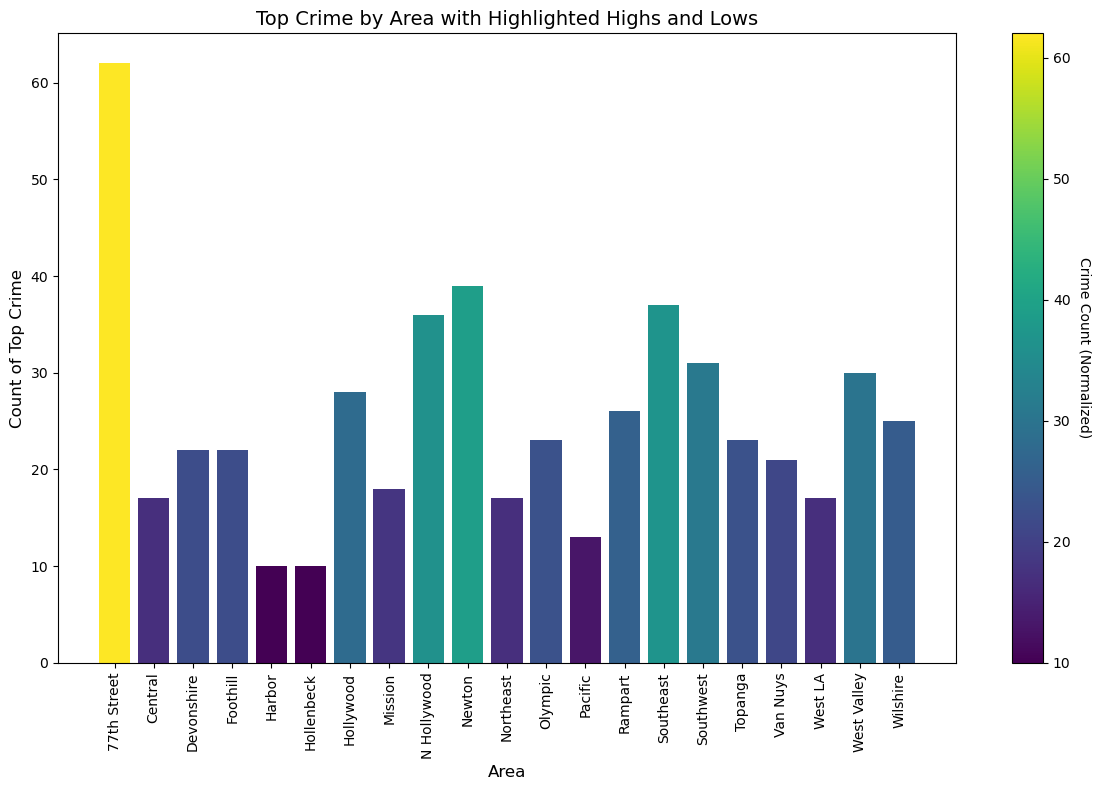

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Since we pivoted, let's select the top crime type for simplicity
# If multiple crimes are tied for the top spot, this will only show one
top_crime_type = top_crimes_pivot.idxmax(axis=1)
crime_counts = top_crimes_pivot.max(axis=1)  # Count of top crime in each area

# Calculate normalized crime counts for color mapping
norm = plt.Normalize(min(crime_counts), max(crime_counts))
colors = cm.viridis(norm(crime_counts))  # Using the "viridis" colormap for perceptual uniformity

plt.figure(figsize=(12, 8))
bars = plt.bar(top_crime_type.index, crime_counts.values, color=colors)

# Add a colorbar to explain the gradient
sm = cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Crime Count (Normalized)', rotation=270, labelpad=15)

# Add labels and title
plt.xlabel('Area', fontsize=12)
plt.ylabel('Count of Top Crime', fontsize=12)
plt.title('Top Crime by Area with Highlighted Highs and Lows', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

In [142]:
crime_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DR_NO                   1071 non-null   int64         
 1   AREA NAME               1071 non-null   object        
 2   Rpt Dist No             1071 non-null   int64         
 3   Crm Cd Desc             1071 non-null   object        
 4   Vict Age                1071 non-null   int64         
 5   Vict Sex                1071 non-null   object        
 6   Premis Desc             1071 non-null   object        
 7   Weapon Desc             1071 non-null   object        
 8   Status Desc             1071 non-null   object        
 9   Date Rptd Standardized  1071 non-null   datetime64[ns]
 10  Month                   1071 non-null   int32         
 11  Day                     1071 non-null   int32         
 12  Year                    1071 non-null   int32   

### Objective

The aim is to uncover patterns in crime occurrences by examining **when crimes happen most frequently**, specifically by **time of day** and **day of the week**. Understanding these patterns is crucial for planning targeted measures and allocating resources effectively during high-crime periods.

### Motive

Analyzing crime by time provides insights into peak hours and days, which helps law enforcement and community stakeholders identify critical times for heightened vigilance and intervention. Recognizing specific time frames—such as late nights or weekends with higher incidents—allows for strategic planning and optimized resource deployment to address crime proactively.

### Approach and Rationale

To address the objective effectively, we structured the analysis through a series of logical steps that transform, group, and visualize the data. This approach maximizes clarity and accuracy in understanding crime timing patterns. Here’s why each step is essential:


1. **Counting Crimes by Day of the Week**:
   - **What we’re doing**: We group the data by `Day of the Week` and count crime occurrences for each day.
   - **Why we’re doing it this way**: Counting crime incidents per day highlights the days with the highest frequency of crimes, providing a clear view of high-risk days. This helps pinpoint when to increase patrols or community initiatives, especially if certain days consistently show high crime levels.

2. **Visualizing with a Bar Chart**:
   - **What we’re doing**: We plot a bar chart to display crime frequency across the days of the week.
   - **Why we’re doing it this way**: A bar chart offers an intuitive, at-a-glance comparison of crime rates across weekdays. It’s easy to interpret for both technical and non-technical audiences, making the data accessible for informed decision-making.


This approach combines detailed and aggregate insights, allowing us to uncover specific high-crime hours and broader time-of-day trends. By focusing on both granular and summarized time information, we provide a comprehensive view that can inform both tactical and strategic decisions. The final visualization enhances accessibility, presenting key insights in a clear format that supports data-driven resource planning and targeted crime-prevention efforts.

In [143]:

# Ensure date and time are in a suitable format
crime_data_cleaned['Date Rptd Standardized'] = pd.to_datetime(crime_data_cleaned['Date Rptd Standardized'])

# Extract time components if not already separate
crime_data_cleaned['Hour'] = crime_data_cleaned['Date Rptd Standardized'].dt.hour
crime_data_cleaned['Day of the Week'] = crime_data_cleaned['Date Rptd Standardized'].dt.day_name()

# If you want to analyze by part of the day (e.g., morning, afternoon)
crime_data_cleaned['Time of Day'] = pd.cut(crime_data_cleaned['Hour'], 
                           bins=[0, 6, 12, 18, 24], 
                           labels=['Late Night/Early Morning', 'Morning', 'Afternoon', 'Evening/Night'],
                           include_lowest=True)


In [144]:
crime_data_cleaned.head()

,DR_NO,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,Status Desc,Date Rptd Standardized,Month,Day,Year,Month_Str,Hour,Day of the Week,Time of Day
0,190326475,Wilshire,784,VEHICLE - STOLEN,0,M,STREET,None,Adult Arrest,2020-03-01 00:00:00,3,1,2020,March,0,Sunday,Late Night/Early Morning
1,200106753,Central,182,BURGLARY FROM VEHICLE,47,M,BUS STOP/LAYOVER (ALSO QUERY 124),None,Invest Cont,2020-02-09 00:00:00,2,9,2020,February,0,Sunday,Late Night/Early Morning
2,200320258,Southwest,356,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,Invest Cont,2020-11-11 00:00:00,11,11,2020,November,0,Wednesday,Late Night/Early Morning
3,200907217,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,CLOTHING STORE,None,Invest Cont,2023-05-10 00:00:00,5,10,2023,May,0,Wednesday,Late Night/Early Morning
4,220614831,Hollywood,666,THEFT OF IDENTITY,28,M,SIDEWALK,None,Invest Cont,2022-08-18 12:00:00,8,18,2022,August,12,Thursday,Morning


### Crime Trends Across Days of the Week: Key Insights

This chart provides a comprehensive view of **crime frequencies across the days of the week**, with several layers of insights for easy interpretation:

#### **Key Features of the Chart**
1. **Bar Heights Represent Crime Frequency**: 
   - Each bar’s height directly corresponds to the number of crimes reported on a given day, offering a quick visual comparison.

2. **Color Gradient for Emphasis**:
   - A smooth gradient highlights variations in crime frequency:
     - **Darker bars** signify days with high crime activity.
     - **Lighter bars** represent days with fewer reported crimes.

3. **Annotations for Extremes**:
   - The chart explicitly marks the:
     - **Day with the most crimes ("Highest")**: Indicating peak criminal activity.
     - **Day with the fewest crimes ("Lowest")**: Identifying the least active crime day.

#### **Insights Gathered from the Chart**
- **Patterns of Criminal Activity**: 
  - Crime rates peak on specific days, which might align with factors such as workdays, holidays, or social patterns.
  - A notable dip on other days (e.g., weekends) suggests reduced activity, potentially due to lower public or workplace engagement.
  
- **Resource Allocation**:
  - High-crime days can inform law enforcement to allocate more resources and patrols on those days.
  - Conversely, low-crime days could allow for reallocation or strategic adjustments.

- **Broader Implications**:
  - Weekly patterns could correlate with external factors like events, social behaviors, or systemic issues, providing opportunities for deeper analysis.

This chart equips non-technical viewers with a clear understanding of when crimes are most likely to occur, empowering decision-makers to target interventions effectively.

C:\Users\srika\AppData\Local\Temp\ipykernel_23288\2069837919.py:15: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



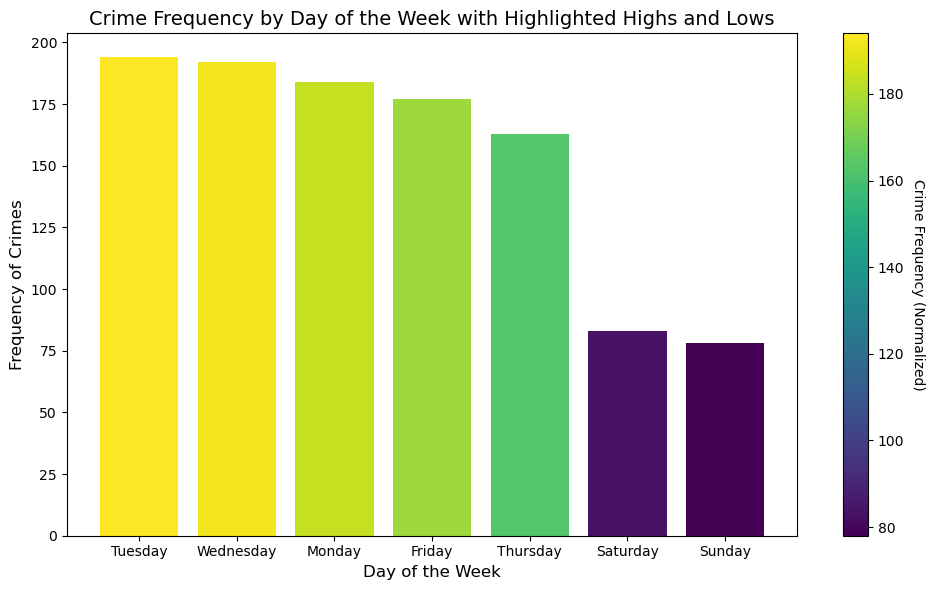

In [145]:

# Group by 'Day of the Week' and count occurrences
weekly_crime_freq = crime_data_cleaned.groupby('Day of the Week')['Crm Cd Desc'].count().sort_values(ascending=False)

# Normalize the crime frequency for color mapping
norm = plt.Normalize(min(weekly_crime_freq), max(weekly_crime_freq))
colors = cm.viridis(norm(weekly_crime_freq))  # Using "viridis" colormap for perceptual uniformity

# Plot the bar chart with color gradients
plt.figure(figsize=(10, 6))
bars = plt.bar(weekly_crime_freq.index, weekly_crime_freq.values, color=colors)

# Add a colorbar to explain the gradient
sm = cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Crime Frequency (Normalized)', rotation=270, labelpad=15)

# Add labels and title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Frequency of Crimes', fontsize=12)
plt.title('Crime Frequency by Day of the Week with Highlighted Highs and Lows', fontsize=14)
plt.xticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


### Crime Frequency by Day and Type (Sunburst Chart)

This **sunburst chart** provides a layered breakdown of crime data, revealing insights about criminal activity across different days and types. Here's how to interpret the chart:

#### **Key Insights**
- **Dominant Crime Days**: Identify which days of the week have the highest overall crime rates by observing the largest central segments.
- **Crime Type Patterns**:
  - Some crime types, such as "Theft of Identity," might dominate specific days, reflecting patterns or trends.
  - Other types might be more evenly distributed, indicating less day-specific behavior.
- **Resource Allocation**:
  - Days with the most varied crime types (e.g., multiple large outer segments) suggest a need for broader coverage.
  - Days with fewer or more concentrated crime types allow for targeted interventions.

This chart not only captures the overall trends but also enables the identification of **specific crime-day relationships**, providing actionable insights for planning and resource deployment.

In [146]:
import plotly.express as px

# Aggregate data
sunburst_data = crime_data_cleaned.groupby(['Day of the Week', 'Crm Cd Desc']).size().reset_index(name='Crime Count')

# Get unique days of the week
days_of_week = sunburst_data['Day of the Week'].unique()

# Generate a sunburst chart for each day
for day in days_of_week:
    day_data = sunburst_data[sunburst_data['Day of the Week'] == day]
    fig = px.sunburst(
        day_data,
        path=['Day of the Week', 'Crm Cd Desc'],
        values='Crime Count',
        title=f'Crime Frequency on {day} (Sunburst)',
        color='Crime Count',
        color_continuous_scale='Viridis'
    )
    fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
    fig.show()



### Crime Types Involving Weapons and Arrests: Insights from the Chart

This bar chart visually represents the top 10 crime types, along with additional details about the involvement of weapons and arrests. Here's how to interpret the chart and the insights it offers:

---

#### **Key Insights**
1. **Dominant Crime Types**:
   - **Theft of Identity** is overwhelmingly the most frequent crime type, with over 500 reported cases, yet it involves neither weapons nor arrests, suggesting its non-violent nature.

2. **Crimes with Weapon Involvement**:
   - Violent crimes such as **Rape (Forcible)** and **Intimate Partner - Simple Assault** have notable weapon involvement, highlighting potential risks and danger.

3. **Arrests and Enforcement**:
   - Some crimes, like **Vehicle Theft**, result in a higher number of arrests, reflecting law enforcement's focused efforts.
   - Other crimes, such as **Burglary**, have low arrest numbers, which might indicate challenges in apprehension or investigation.

4. **Policy Implications**:
   - High-frequency but low-arrest crimes like **Theft of Identity** may require stronger preventative measures or policy changes.
   - High-arrest crimes might suggest areas of effective law enforcement that could be replicated for other crime types.

---

This chart offers a multi-faceted view of crime, helping both policymakers and law enforcement to prioritize resources and strategies.

C:\Users\srika\AppData\Local\Temp\ipykernel_23288\2513191099.py:62: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



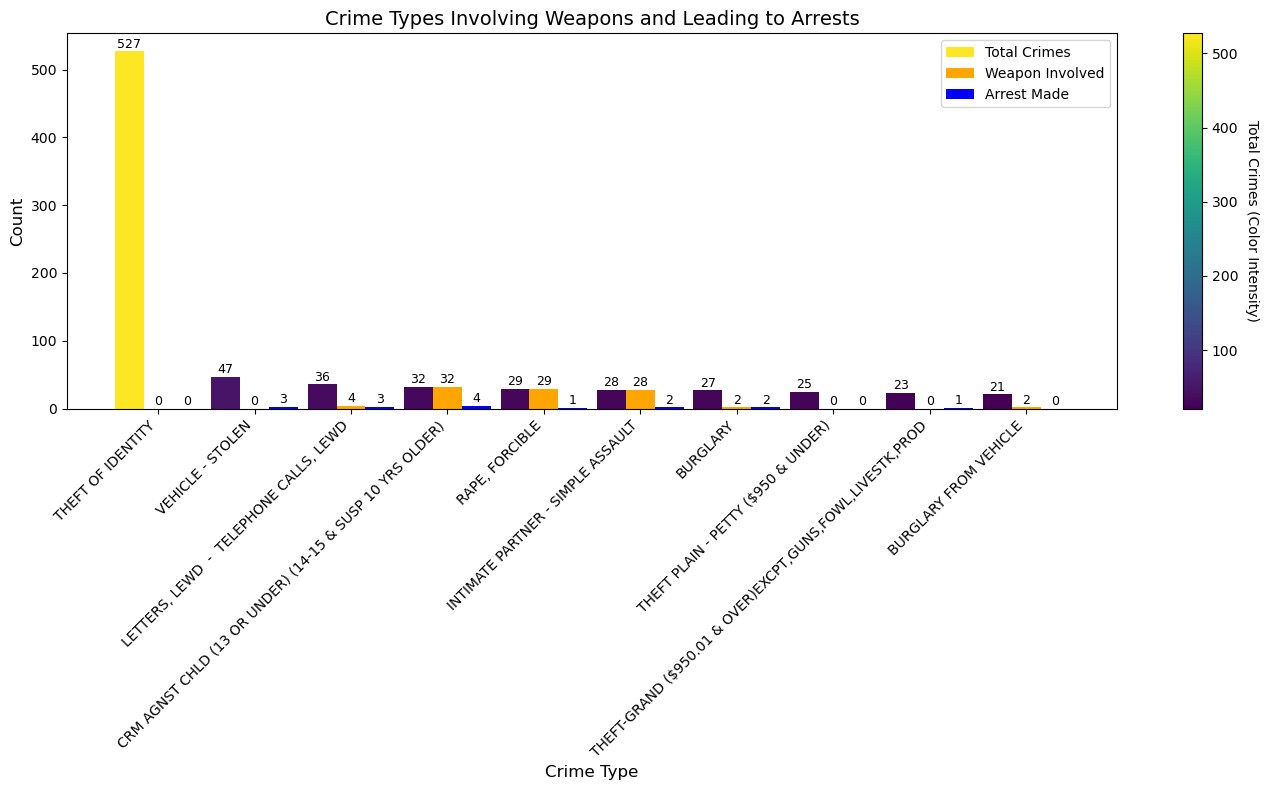

In [147]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

# Assuming `crime_data_cleaned` is your DataFrame

# Create derived columns
crime_data_cleaned['Weapon Involved'] = crime_data_cleaned['Weapon Desc'].notna() & (crime_data_cleaned['Weapon Desc'].str.lower() != "none")
crime_data_cleaned['Arrest Made'] = crime_data_cleaned['Status Desc'].str.contains("Adult Arrest|Juv Arrest", na=False)

# Aggregating the data
weapon_arrest_data = crime_data_cleaned.groupby('Crm Cd Desc').agg(
    Total_Crimes=('Crm Cd Desc', 'count'),
    Weapon_Involved=('Weapon Involved', 'sum'),
    Arrest_Made=('Arrest Made', 'sum')
).sort_values('Total_Crimes', ascending=False).head(10)  # Top 10 crime types

# Plotting
x = weapon_arrest_data.index
total_crimes = weapon_arrest_data['Total_Crimes']
weapon_related = weapon_arrest_data['Weapon_Involved']
arrest_related = weapon_arrest_data['Arrest_Made']

# Normalize values for the Viridis colormap
norm = plt.Normalize(vmin=min(total_crimes), vmax=max(total_crimes))
viridis_colors = cm.viridis(norm(total_crimes))

# Create the bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.3
x_positions = range(len(x))

# Plot total crimes, weapon-related crimes, and arrests with Viridis colors
total_bars = plt.bar(x_positions, total_crimes, width=bar_width, label='Total Crimes', color=viridis_colors)
weapon_bars = plt.bar([p + bar_width for p in x_positions], weapon_related, width=bar_width, label='Weapon Involved', color='orange')
arrest_bars = plt.bar([p + 2 * bar_width for p in x_positions], arrest_related, width=bar_width, label='Arrest Made', color='blue')

# Add data labels
for bar in total_bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=9)

for bar in weapon_bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=9)

for bar in arrest_bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=9)

# Add labels and legend
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Crime Types Involving Weapons and Leading to Arrests', fontsize=14)
plt.xticks([p + bar_width for p in x_positions], x, rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)

# Add a colorbar for the Viridis scale
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Total Crimes (Color Intensity)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


### Treemap of Weapon-Related Crimes and Arrests: Insights

This **treemap visualization** provides an overview of crimes involving weapons, highlighting their frequency and the corresponding number of arrests. Here's how to interpret it and the insights it offers:

---

#### **Structure of the Treemap**
1. **Block Size**:
   - Each block represents a specific type of crime. The size of the block is proportional to the number of crimes involving weapons.

2. **Color Gradient**:
   - The intensity of the color represents the number of arrests made for each crime type.
   - **Darker blocks** indicate crime types with a higher number of arrests.

3. **Hover Data**:
   - When you hover over a block, additional details are displayed:
     - Total number of crimes.
     - Number of crimes involving weapons.
     - Number of arrests.

---

#### **Key Insights**
1. **Dominant Weapon-Related Crimes**:
   - The largest blocks indicate the most prevalent weapon-related crimes.
   - Crimes like **Rape** or **Aggravated Assault** might show high weapon involvement due to their violent nature.

2. **Arrests and Law Enforcement Effectiveness**:
   - Blocks with high arrest numbers (darker colors) suggest areas where law enforcement has been successful in addressing these crimes.
   - Conversely, lighter blocks highlight crime types where arrests are less frequent, suggesting potential challenges in enforcement or investigation.

3. **Policy and Resource Implications**:
   - High weapon-related crimes with low arrests may indicate a need for focused intervention.
   - Crimes with smaller blocks but dark colors show areas where targeted efforts are yielding results, which could be expanded to other crime types.

---

This treemap not only emphasizes the role of weapons in crimes but also provides a clear linkage to enforcement outcomes, guiding strategic decision-making.

In [148]:
import plotly.express as px
import pandas as pd

# Filter the data to include only crimes with weapons involved
weapon_crime_data = crime_data_cleaned[crime_data_cleaned['Weapon Involved']]

# Aggregating the data for treemap
weapon_arrest_data = weapon_crime_data.groupby('Crm Cd Desc').agg(
    Total_Crimes=('Crm Cd Desc', 'count'),
    Weapon_Involved=('Weapon Involved', 'sum'),
    Arrest_Made=('Arrest Made', 'sum')
).reset_index()

# Create Treemap
fig = px.treemap(
    weapon_arrest_data,
    path=['Crm Cd Desc'],  # Hierarchical levels: Crime Type
    values='Weapon_Involved',  # Size of each block based on weapon involvement
    color='Arrest_Made',  # Color intensity based on total arrests
    hover_data={'Total_Crimes': True, 'Weapon_Involved': True, 'Arrest_Made': True},
    title='Treemap of Weapon-Related Crimes and Arrests',
    color_continuous_scale='Viridis',
    labels={
        'Crm Cd Desc': 'Crime Type',
        'Total_Crimes': 'Total Crimes',
        'Weapon_Involved': 'Weapon-Related Crimes',
        'Arrest_Made': 'Total Arrests'
    }
)

# Update layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    template='plotly_white'
)

fig.show()


### Conclusion 

The analysis presented in this file provides a comprehensive overview of crime trends, types, and enforcement outcomes. Here are the key takeaways:

1. **Crime Distribution Patterns**:
   - Crimes vary significantly across days of the week, with clear peaks and troughs reflecting societal routines and behaviors.
   - Certain types of crimes, such as **Theft of Identity**, dominate the dataset, highlighting areas that may need enhanced preventative measures.

2. **Weapon Involvement**:
   - The inclusion of weapons in crimes adds a layer of complexity and danger, with certain crime types (e.g., violent assaults) showing a higher prevalence of weapon use.
   - This underscores the need for targeted policing strategies and preventative measures for weapon-related crimes.

3. **Arrest Trends**:
   - The analysis revealed disparities in arrest rates across crime types. Some crimes see frequent arrests (indicating effective enforcement), while others exhibit low arrest rates, signaling potential challenges in investigation or evidence collection.

4. **Visualization Insights**:
   - The use of **sunburst charts** and **treemaps** allowed for a nuanced view of crime distribution, weapon involvement, and arrest outcomes, providing actionable insights at multiple levels of granularity.

5. **Policy Implications**:
   - High-frequency crimes like **Theft of Identity** require systemic interventions, such as improved cybersecurity or fraud detection systems.
   - Resource allocation should focus on addressing crimes with high weapon involvement and low arrest rates to enhance public safety.

### Final Thoughts
This analysis serves as a data-driven guide for stakeholders, including policymakers and law enforcement agencies, to prioritize resources and develop strategies that address the most pressing crime-related challenges. Further research could delve into the underlying causes of these patterns and explore regional or temporal trends to refine intervention efforts.